In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.load_data import load_data
from sklearn.preprocessing import StandardScaler
import jax.numpy as jnp
from src.svm import MultiClassKernelSVM
import pandas as pd

In [3]:
data_folder = "data"
Xtr_flat, Ytr_flat, Xte_flat = load_data(data_folder, reshape=False)
print(f"Xtr {Xtr_flat.shape}; Ytr {Ytr_flat.shape}; Xte {Xte_flat.shape}")

Xtr, Ytr, Xte = load_data(data_folder, reshape=True)
print(f"Xtr {Xtr.shape}; Ytr {Ytr.shape}; Xte {Xte.shape}")

Xtr (5000, 3072); Ytr (5000,); Xte (2000, 3072)
Xtr (5000, 32, 32, 3); Ytr (5000,); Xte (2000, 32, 32, 3)


In [4]:
print(f"Xtr mean {Xtr_flat.mean(axis=0)} ; var {Xtr_flat.var(axis=0)}")

# should we z-scored the data ?
scaler = StandardScaler()
Xtr_flat = scaler.fit_transform(Xtr_flat)
print(f"Xtr mean {Xtr_flat.mean(axis=0)} ; var {Xtr_flat.var(axis=0)}")

Xtr mean [-2.47982934e-04 -1.74261584e-03 -9.22621259e-05 ...  2.58250453e-03
  2.19476255e-03  3.04047441e-03] ; var [0.00167989 0.00118951 0.00118582 ... 0.00124412 0.00126839 0.00177964]
Xtr mean [-2.84217094e-18 -7.10542736e-18 -1.84741111e-17 ... -1.84741111e-17
 -8.52651283e-18 -1.24344979e-17] ; var [1. 1. 1. ... 1. 1. 1.]


### Kernel SVM

In [9]:
n_classes = 10
ntrain = 500

In [46]:
# from kernelchallenge.classifiers.svm import rbf_kernel

In [10]:
# my_svm = MultiClassSVM(num_classes=n_classes, kernel_func=rbf_kernel, c=1)
# my_svm.fit(Xtr_flat[:ntrain], Ytr_flat[:ntrain])
# pred = my_svm.predict(Xtr_flat[ntrain:])

# print(f"Accuracy {jnp.mean(pred == Ytr_flat[ntrain:])}")

In [6]:
from kernelchallenge.kernels import RBF

In [14]:
sigma = jnp.sqrt(Xtr_flat.shape[1])
c = 1
kernel_func = RBF(sigma=sigma)
my_svm = MultiClassKernelSVM(num_classes=n_classes, kernel_func=kernel_func, c=c)
my_svm.fit(Xtr_flat[:ntrain], Ytr_flat[:ntrain])
pred = my_svm.predict(Xtr_flat[ntrain:])

print(f"Accuracy {jnp.mean(pred == Ytr_flat[ntrain:])}")

Function fit took 4.92 seconds
Function predict took 43.04 seconds
Accuracy 0.14733333885669708


In [16]:
ntrain = Xtr_flat.shape[0]
kernel_func = RBF(sigma=sigma)
my_svm = MultiClassKernelSVM(num_classes=n_classes, kernel_func=kernel_func, c=c)
my_svm.fit(Xtr_flat[:ntrain], Ytr_flat[:ntrain])

Function fit took 421.93 seconds


In [ ]:
Xte = scaler.transform(Xte_flat)
Yte = my_svm.predict(Xte)
Yte = {"Prediction": Yte}
dataframe = pd.DataFrame(Yte)
dataframe.index += 1

In [21]:
dataframe.to_csv(f"{data_folder}/Yte.csv", index_label="Id")

In [32]:
# TEST ON ANOTHER DATASET
# from sklearn import datasets
# from sklearn import preprocessing
# from absl import flags


# flags.DEFINE_float("tol", 1e-5, "Tolerance of solvers.")
# flags.DEFINE_float("l2reg", 1000., "Regularization parameter. Must be positive.")
# flags.DEFINE_integer("num_samples", 20, "Size of train set.")
# flags.DEFINE_integer("num_features", 5, "Features dimension.")
# flags.DEFINE_integer("num_classes", 3, "Number of classes.")
# flags.DEFINE_bool("verbose", False, "Verbosity.")
# FLAGS = flags.FLAGS

# num_samples = 400
# num_features = 5
# num_classes = 3

# X, y = datasets.make_classification(n_samples=num_samples, n_features=num_features,
#                                       n_informative=3, n_classes=num_classes, random_state=0)
# X = preprocessing.Normalizer().fit_transform(X)
# Y = preprocessing.LabelBinarizer().fit_transform(y)
# Y = jnp.array(Y)

In [34]:
# ntrain = 300
# my_svm = MultiClassSVM(num_classes=n_classes, kernel_func=rbf_kernel, c=1)
# my_svm.fit(X[:ntrain], y[:ntrain])
# pred = my_svm.predict(X[ntrain:])

# print(f"Accuracy {jnp.mean(pred == y[ntrain:])}")

Function fit took 1.88 seconds
Function predict took 0.20 seconds
Accuracy 0.7899999618530273


# CKN 

In [6]:
import matplotlib.pyplot as plt

(50, 50, 1)
(50, 50, 3)


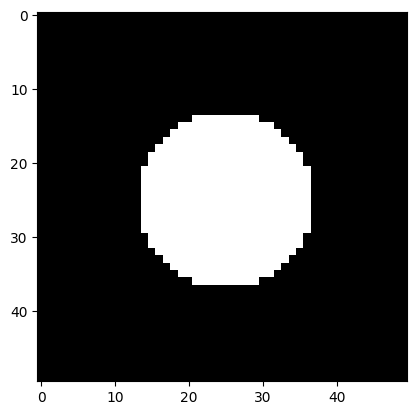

In [15]:
h = 50
x, y = jnp.meshgrid(jnp.arange(h), jnp.arange(h))
r = int(h/4)
c = [int(h/2), int(h/2)]
circle = jnp.sqrt((x-c[0])**2 + (y-c[1])**2) - r


img = jnp.where(circle<0, 255, 0)[..., jnp.newaxis]
print(img.shape)
img = jnp.repeat(img, 3, axis=2)
print(img.shape)

plt.imshow(img)
plt.show()

In [122]:
def get_ovelapping_patch_idx(h : int, w:int, patch_size: int =3):
        """  """
        xp, yp = jnp.meshgrid(jnp.arange(w-patch_size+1), jnp.arange(h-patch_size+1))
        x, y = jnp.meshgrid(jnp.arange(patch_size), jnp.arange(patch_size))
        X = x[None, None, ...] + xp[..., None, None]
        X = X.reshape(-1, patch_size, patch_size)
        Y = y[None, None, ...] + yp[..., None, None]
        Y = Y.reshape(-1, patch_size, patch_size)

        return (Y, X)

class ConvKN:
    """ CKN Layer """


    def __init__(self, patch_size:int, out_channels : int, subsampling_factor : float = jnp.sqrt(2)) -> None:
        self.patch_size = patch_size
        self.patch_idx = None
        self.Z = None
        self.out_channels = out_channels
        self.subsampling_factor = subsampling_factor

    def extract_patches_2d(self, img : jnp.ndarray):
        if self.patch_idx is None :
            # to do once
            h, w, _ = img.shape
            self.patch_idx = get_ovelapping_patch_idx(h, w, self.patch_size)

        return img[self.patch_indices]
    
    def train(self, input_maps):
        pass
        
    
    def forward(self, input_maps : jnp.ndarray):
        """
        :param input_maps : array of size (B, C, H, W) B is batch size, C is channel size (e.g. 3)
        """

        if self.Z is None:
             raise Warning('Filters Z have to be initialized or learned. Call .train() befor evaluating model')
        


In [132]:
patch_idx = get_ovelapping_patch_idx(img.shape, patch_size=25)
patches = extract_patches_2d(img, patch_idx)

In [133]:
patches.shape

(676, 25, 25, 3)

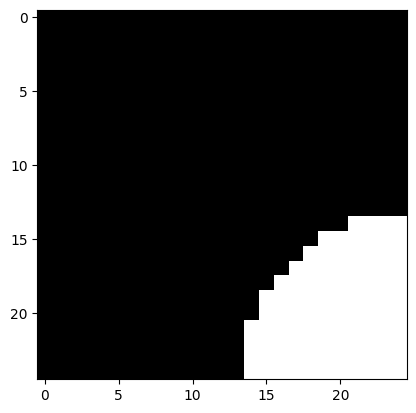

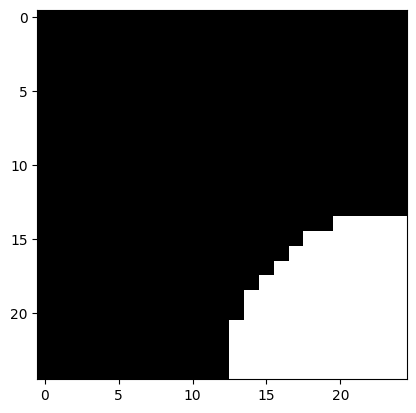

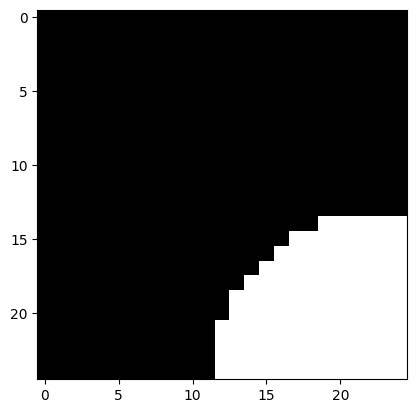

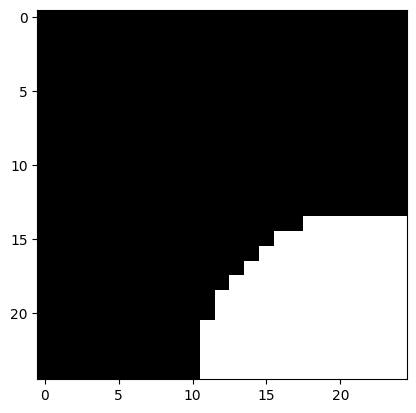

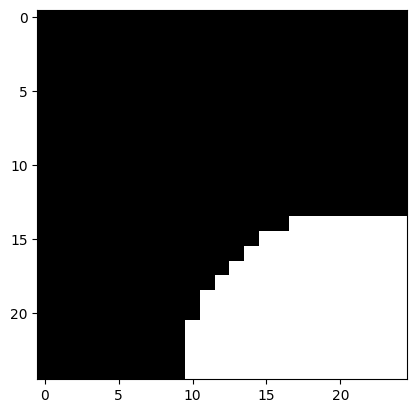

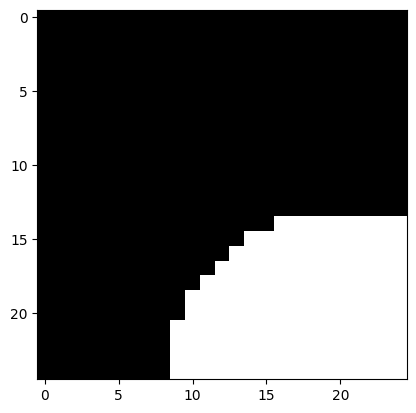

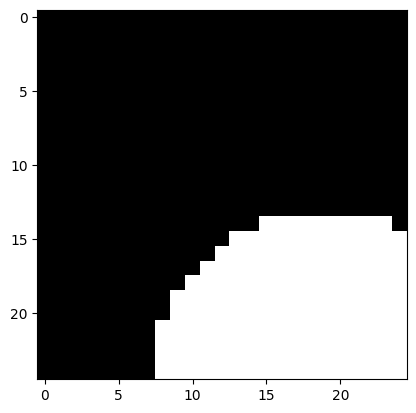

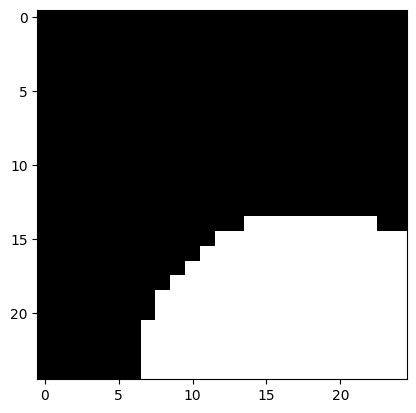

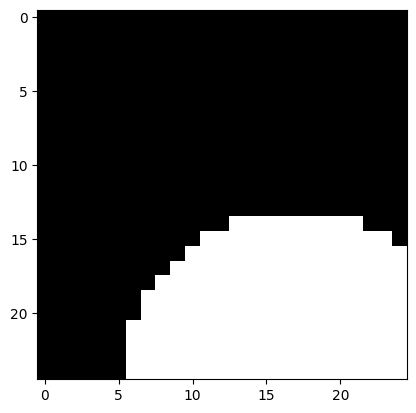

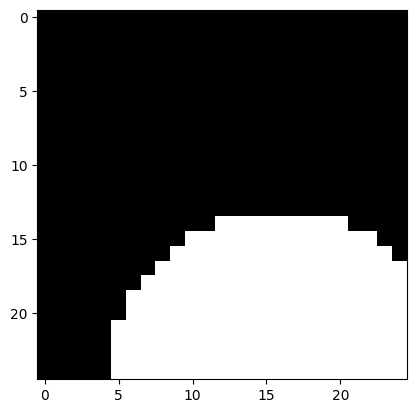

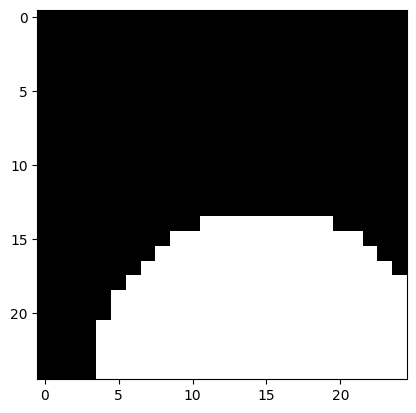

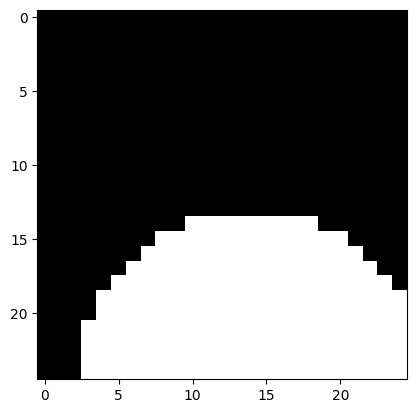

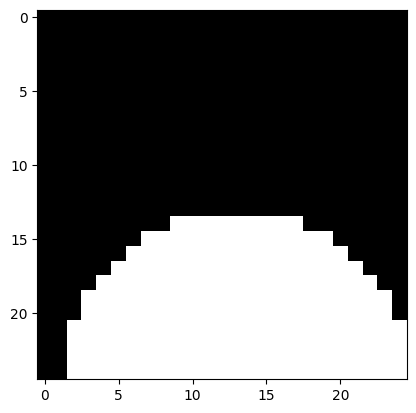

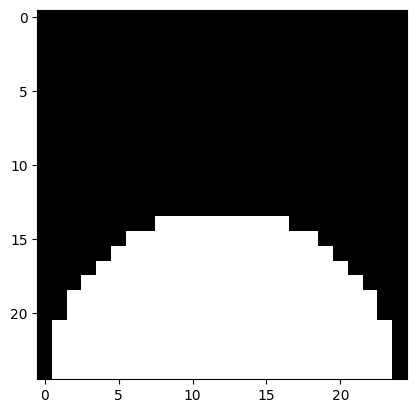

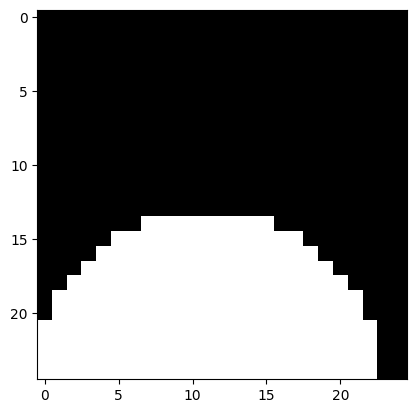

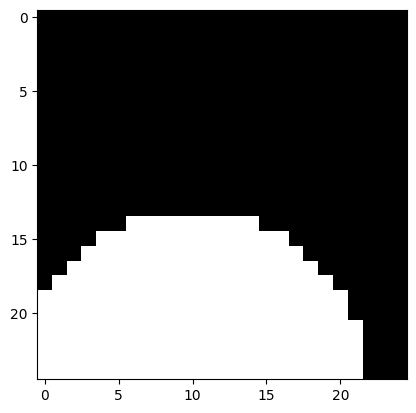

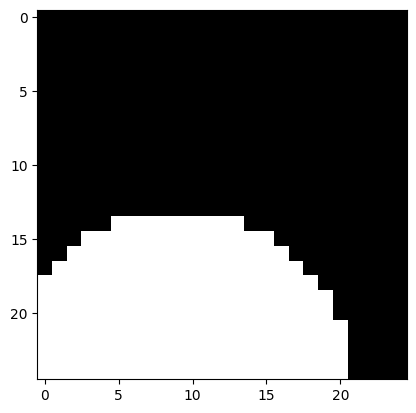

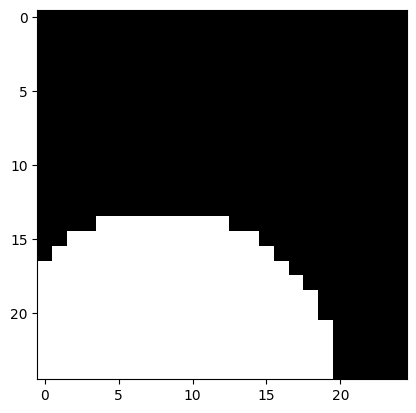

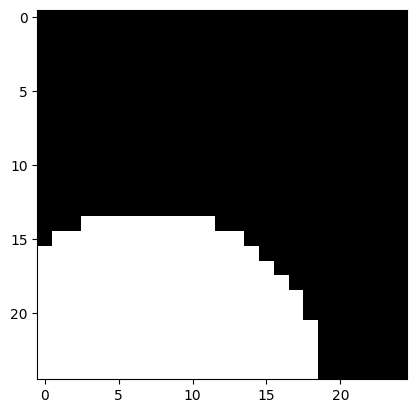

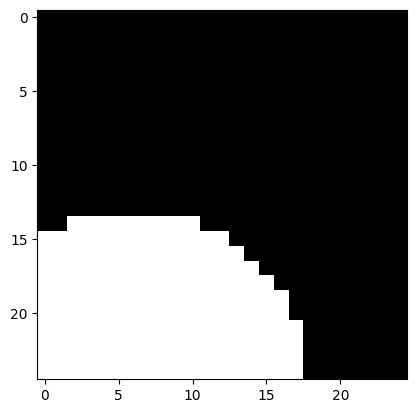

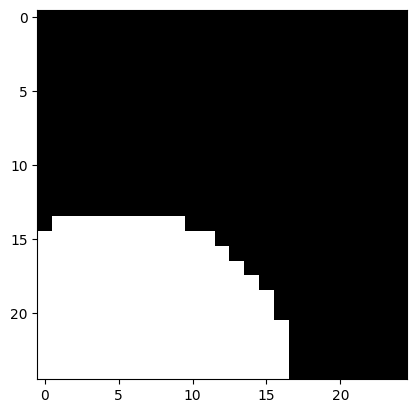

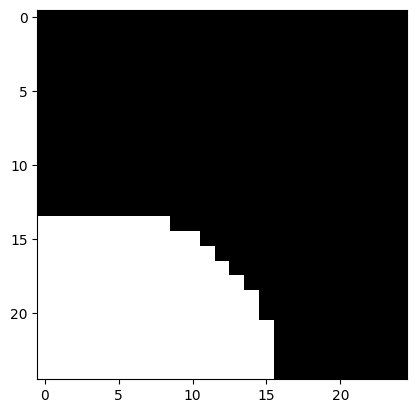

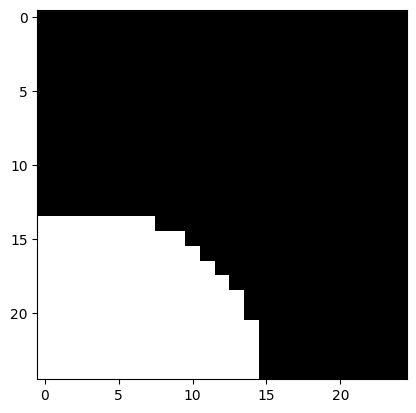

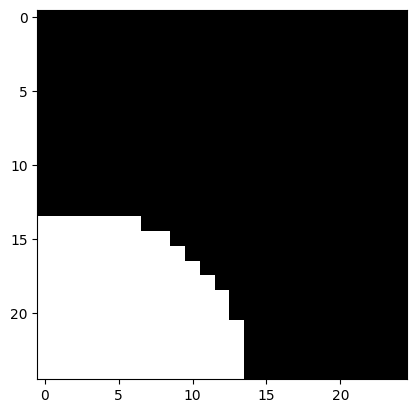

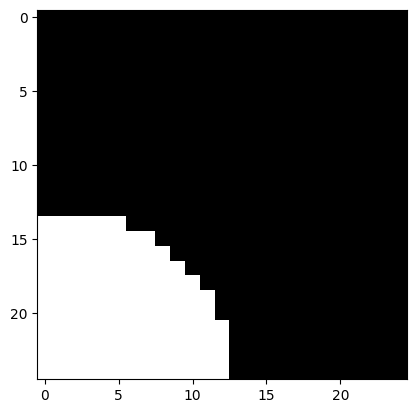

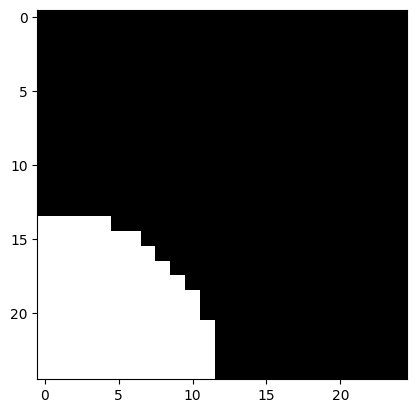

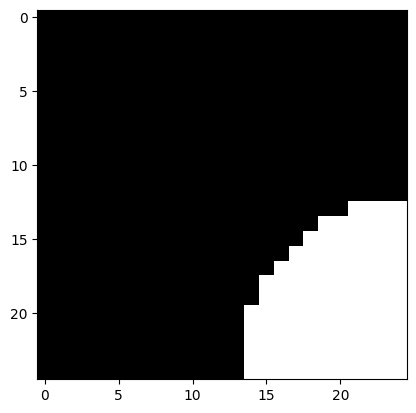

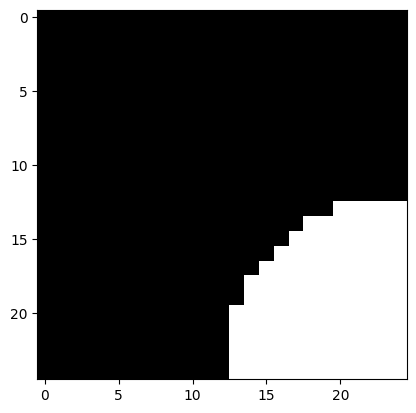

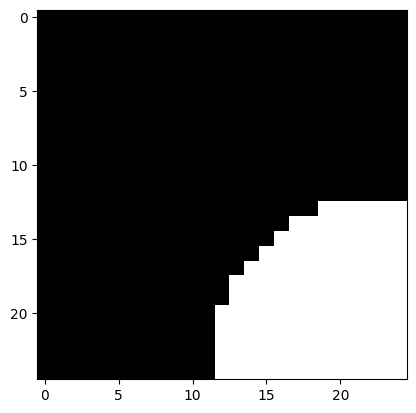

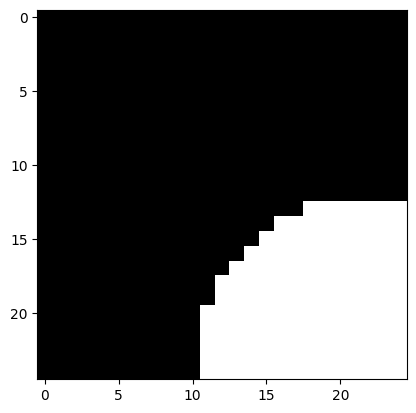

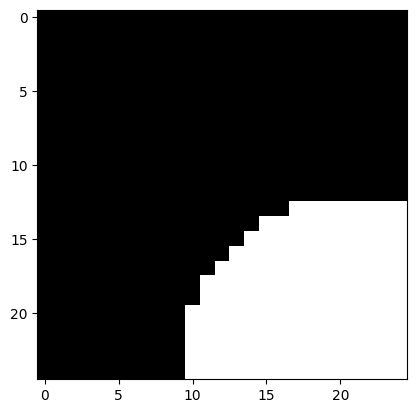

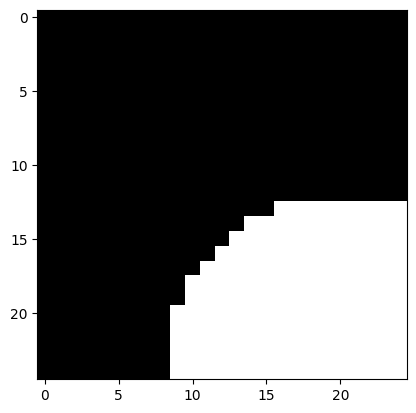

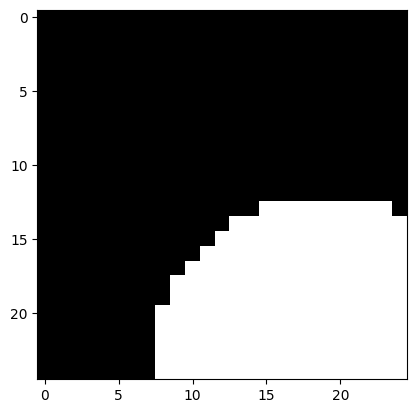

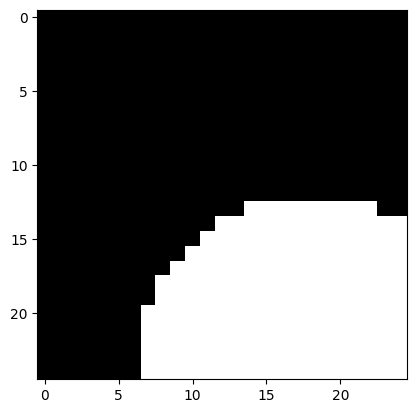

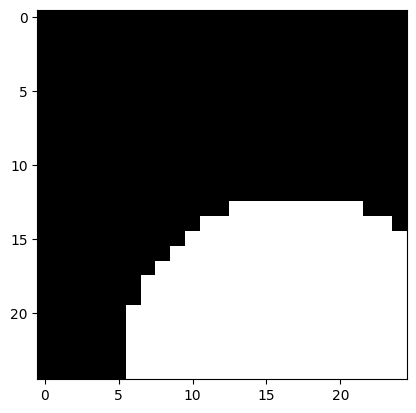

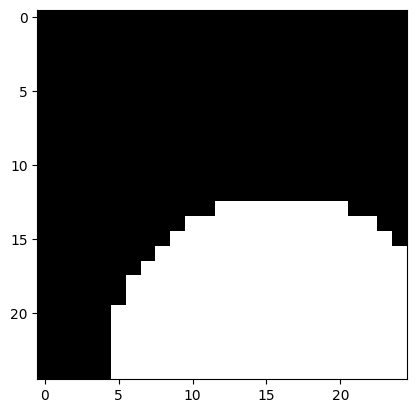

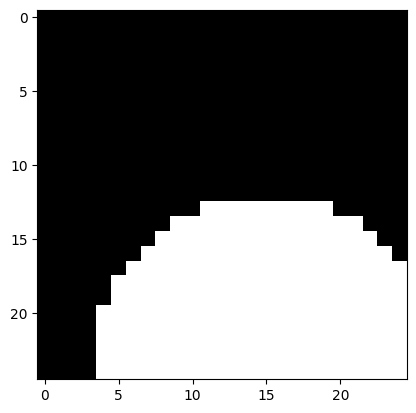

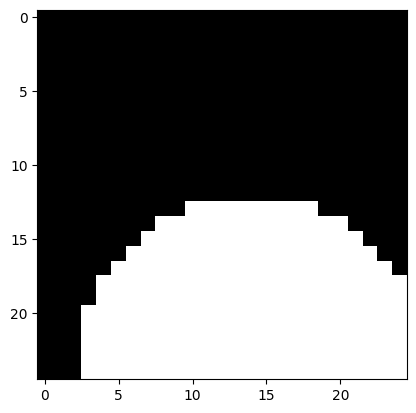

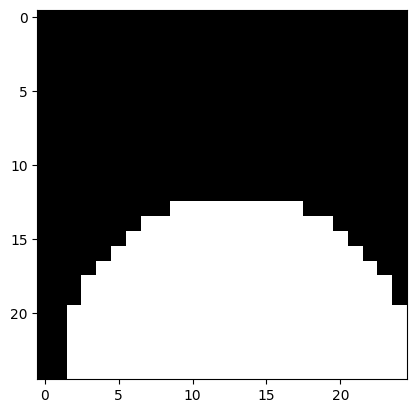

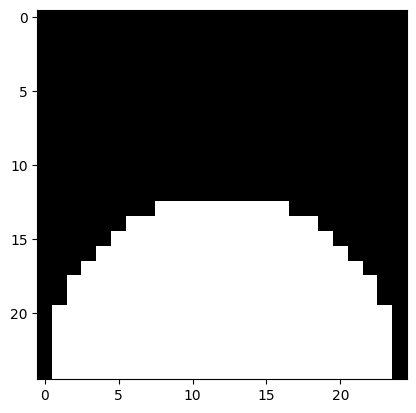

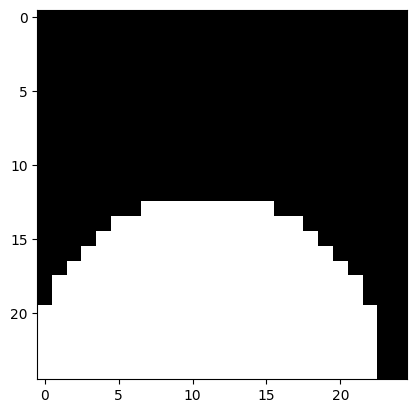

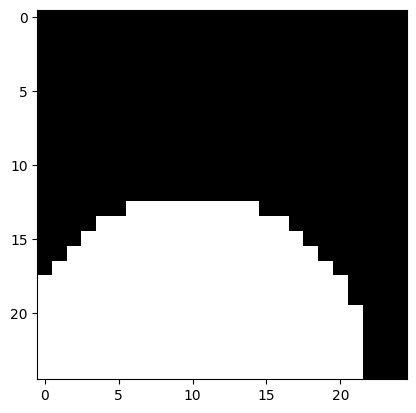

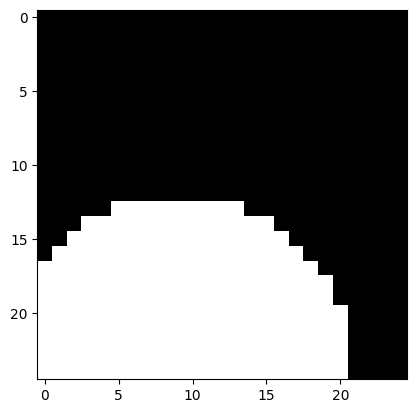

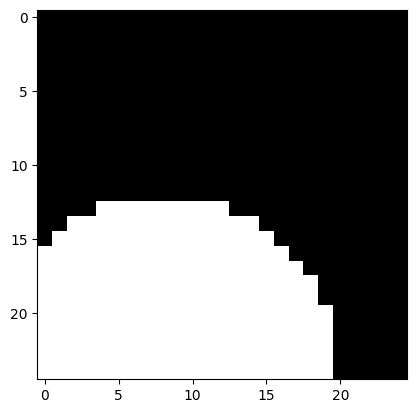

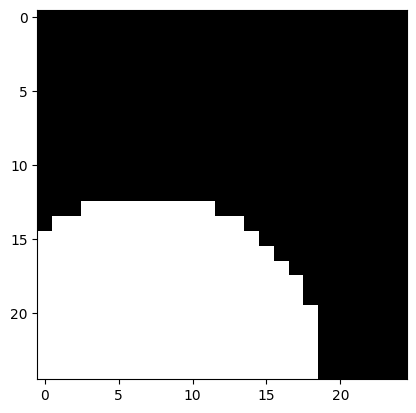

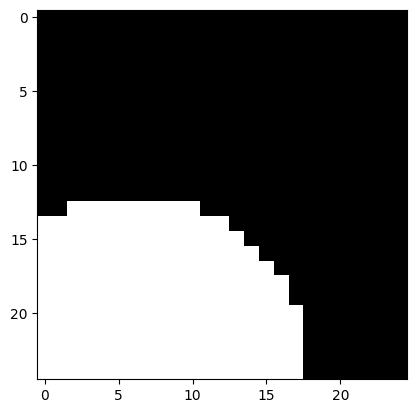

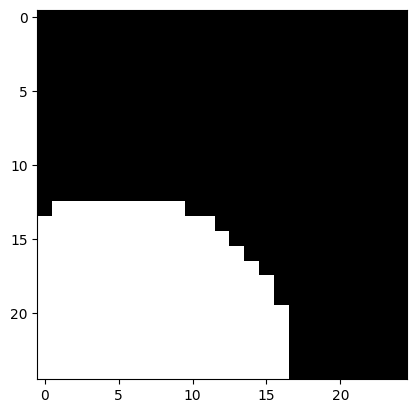

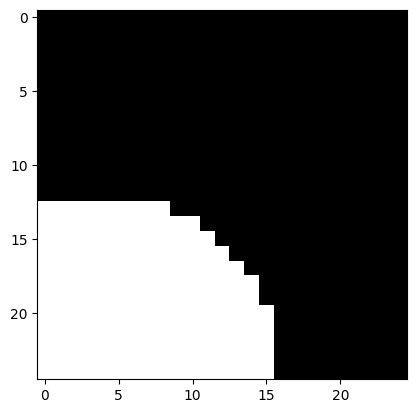

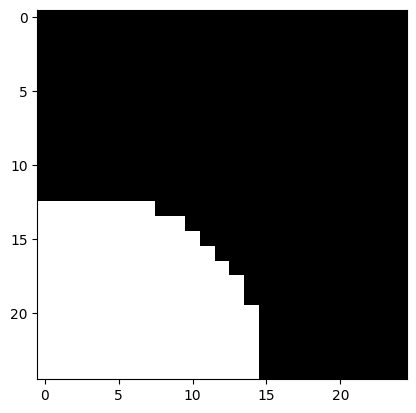

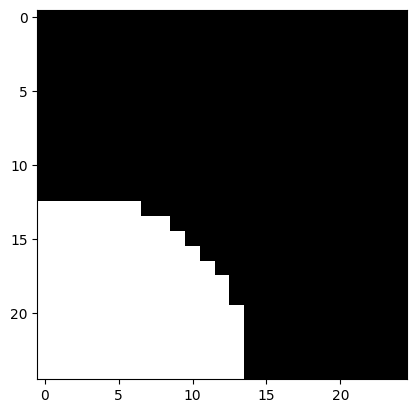

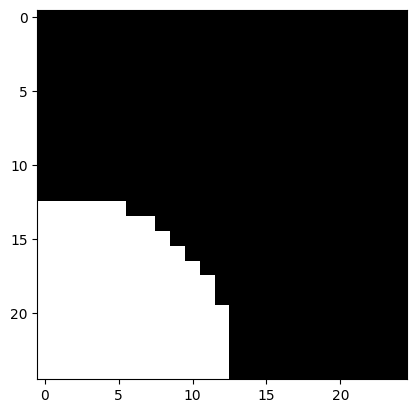

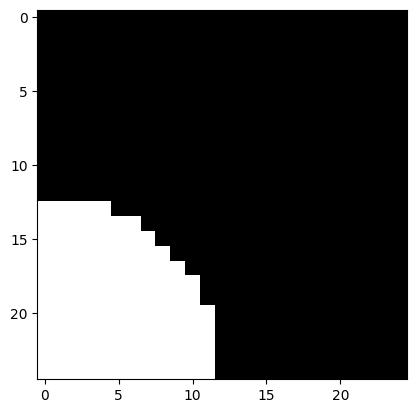

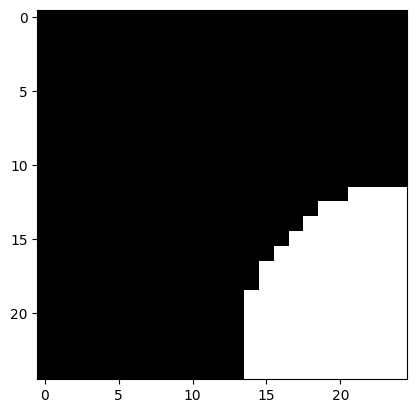

KeyboardInterrupt: 

In [135]:
for i in range(patches.shape[0]):
    plt.imshow(patches[i])
    plt.show()